In [81]:

import os
import sys
sys.path.append("/mnt/scratch/henrypurcell/N3AS/Emu_scripts/spinflip")
import yt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import h5py
import spin_flip_tools as sft
import gellmann as gm
from constants import hbar, c, M_p, M_3flavor, G
import glob
import concurrent
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator,LogLocator)
from matplotlib import cm, colors
import matplotlib.axes as ax
from mpl_toolkits.mplot3d import Axes3D
from four_current import four_current, read_gradients
from matrix import visualizer
#import latex
from itertools import product


# For ease of development, reload the relevant modules to make sure they are up to date.
import importlib
importlib.reload(sft)
importlib.reload(gm)

################
# plot options #
################
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['font.size'] = 10
mpl.rcParams['font.family'] = 'serif'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
#mpl.rc('text', usetex=True)
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.grid'] = True
#fig,ax = plt.subplots()

def sin(theta):
    return np.sin(theta)
def cos(theta):
    return np.cos(theta)
def exp(x):
    return np.exp(x)
pi=np.pi




location=[80,73,99]
xmin = 75
xmax = 83
ymin = 67
ymax = 77
zmin = 97
zmax = 99

merger_data_filename = "/mnt/scratch/shared/2-orthonormal_distributions/model_rl0_orthonormal_rotated.h5"
emu_data_loc = "/mnt/scratch/shared/3-Henry_NSM_box/"
emu_filename = emu_data_loc + "i{:03d}".format(location[0])+"_j{:03d}".format(location[1])+"_k{:03d}".format(location[2])+"/allData.h5"
gradient_filename = "/mnt/scratch/shared/4-gradients/gradients.h5"
p_abs = 1e7 # eV

#class SpinParams:
 #   def __init__(self, t_sim, emu_file, merger_data_loc, location, p_abs, resonance_type = 'full', density_matrix =np.diag([1,0,0,0,0,0]), gradient_filename = None):
    

In [83]:
mingradients = sft.Gradients(gradient_filename,merger_data_filename).minGradients( emu_data_loc, p_abs)

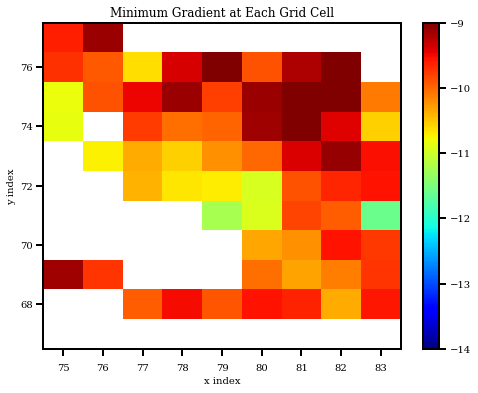

In [82]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, min_gradients=mingradients)

In [86]:
sft.Gradients(gradient_filename,merger_data_filename).limits[2,0]

97

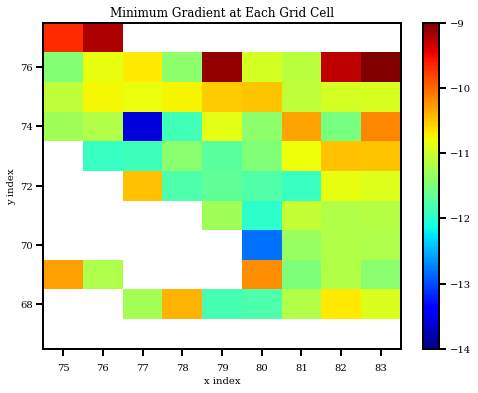

In [84]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, phi_resolution = 100)

In [91]:
np.linspace(0,3,1)

array([0.])

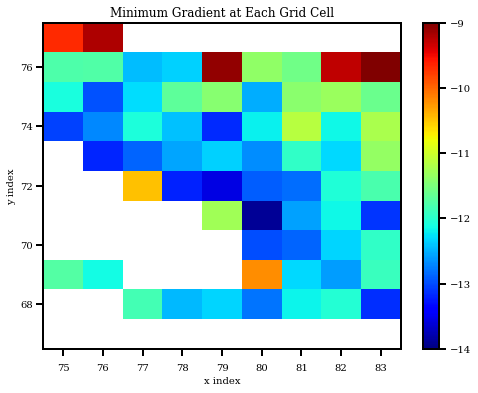

In [85]:
sft.Gradients(gradient_filename,merger_data_filename).gradientsPlot(emu_data_loc, p_abs, 1, phi_resolution = 1000)

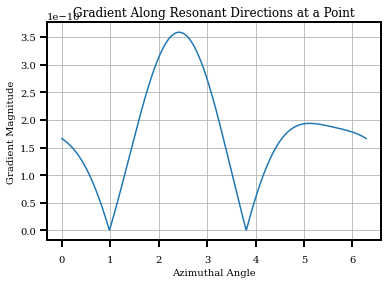

In [88]:
location=[77,74,98]
emu_filename = emu_data_loc + "i{:03d}".format(location[0])+"_j{:03d}".format(location[1])+"_k{:03d}".format(location[2])+"/allData.h5"

sft.SpinParams(0, emu_filename, merger_data_filename, location, p_abs, resonance_type = 'simplified', gradient_filename=gradient_filename).azimuthalGradientsPlot(phi_resolution = 1000)

1.3909618656577518
Largest timescale = 3.702118733504426e-06 s


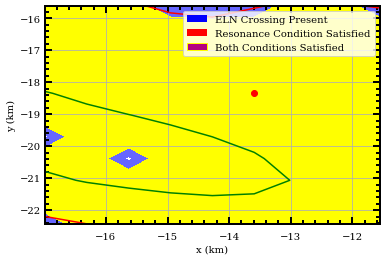

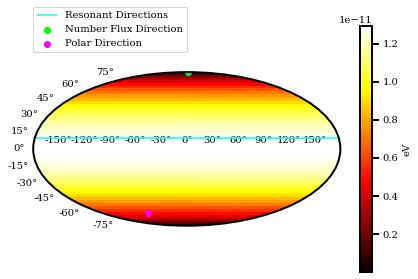

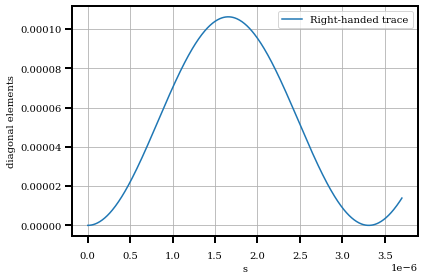

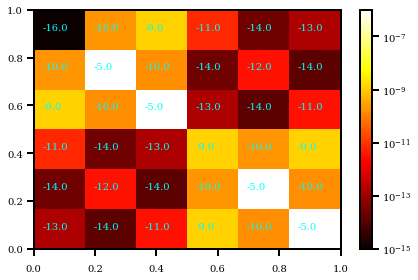

In [ ]:
sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'full', p_abs=p_abs).pointPlots(0,traceless = True, text = 'mag', savefig=True)

In [50]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading=None, antialiased=False, data=None, **kwargs)
    Create a pseudocolor plot with a non-regular rectangular grid.
    
    Call signature::
    
        pcolormesh([X, Y,] C, **kwargs)
    
    *X* and *Y* can be used to specify the corners of the quadrilaterals.
    
    .. hint::
    
       `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
       and preferred in most cases. For a detailed discussion on the
       differences see :ref:`Differences between pcolor() and pcolormesh()
       <differences-pcolor-pcolormesh>`.
    
    Parameters
    ----------
    C : 2D array-like
        The color-mapped values.
    
    X, Y : array-like, optional
        The coordinates of the corners of quadrilaterals of a pcolormesh::
    
            (X[i+1, j], Y[i+1, j])       (X[i+1, j+1], Y[i+1, j+1])
                                  +--

1.3909618656577518
Largest timescale = 3.702118733504426e-06 s


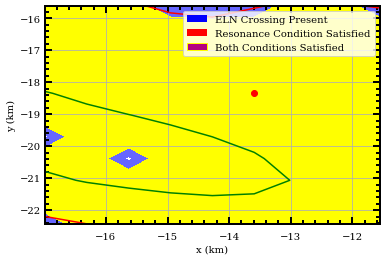

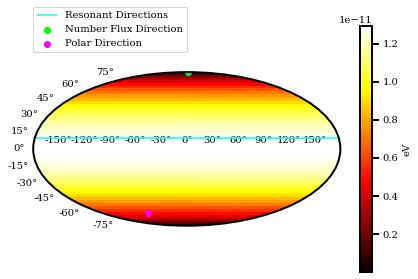

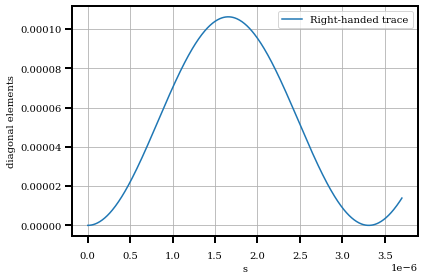

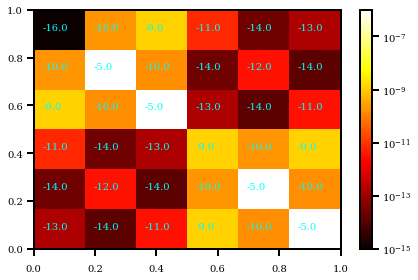

In [52]:
sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'full', p_abs=p_abs).pointPlots(0,traceless = True, text = 'mag',savefig=True)

In [50]:
visualizer(sft.SpinParams(0, emu_filename,merger_data_filename,location, p_abs, resonance_type = 'full', density_matrix=np.diag([1/2,0,0,1/2,0,0])).resonant_Hamiltonian())

ValueError: f(a) and f(b) must have different signs

In [51]:
GM = gm.get_GM(6)
GM[1]
projection_H = gm.projection(sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'simplified', p_abs=p_abs).resHamiltonian(0))
projection_P = gm.projection(np.diag((1,0,0,0,0,0)))
projection_P

1.3909679927558272


array([0.5       +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.28867513+0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.20412415+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.15811388+0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.12909944+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j])

In [45]:
np.diag(sft.MultiPlot(location[0], location[1], location[2],  emu_filename, xmin, xmax, ymin, ymax,merger_data_filename,resonance_type = 'simplified', p_abs=p_abs).resHamiltonian(0)
)

1.3909679927558272


array([ 1.99887726e-08+0.j,  4.17392733e-06+0.j,  4.17500215e-06+0.j,
        1.99887728e-08+0.j, -4.13689654e-06+0.j, -4.13582172e-06+0.j])

In [126]:
proj =gm.projection([[1,0,0],[0,0,0],[0,0,0]])
proj

array([0.5       +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.28867513+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])